In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords


In [3]:
stop_words = stopwords.words('english')
df = pd.read_json('json/Digital_Music_5.json', lines=True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain....","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Memory of Trees is a masterpiece of subtlety. Many of the songs have an endearing shyness to them - soft piano and a lovely, quiet voice. But within ev...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,5555991584,"[2, 2]",5,"I never thought Enya would reach the sublime heights of Evacuee or Marble Halls from 'Shepherd Moons.' 'The Celts, Watermark and Day...' were all pleasant and admirable throughout, but are less am...","07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,5555991584,"[1, 1]",5,This is the third review of an irish album I write today (the others were Cranberries) and now I'm sure about that Ireland is one of the countries producing the best music in the world. And not ju...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording artist, doesn't have the broad appeal as other artists; one reason might be that her kind of music is not very pop station friendly while another reason ...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


In [4]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()


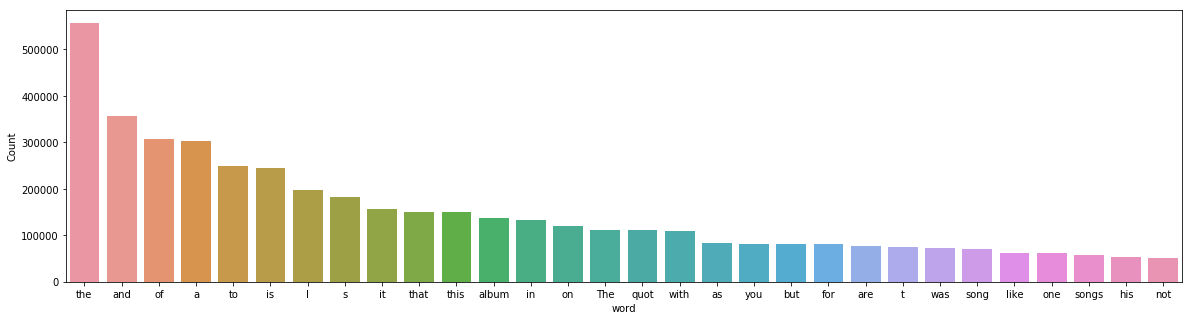

In [5]:
freq_words(df['reviewText'].str.replace("[^a-zA-Z#]", " "))

In [6]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new
# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]
# make entire text lowercase
reviews = [r.lower() for r in reviews]

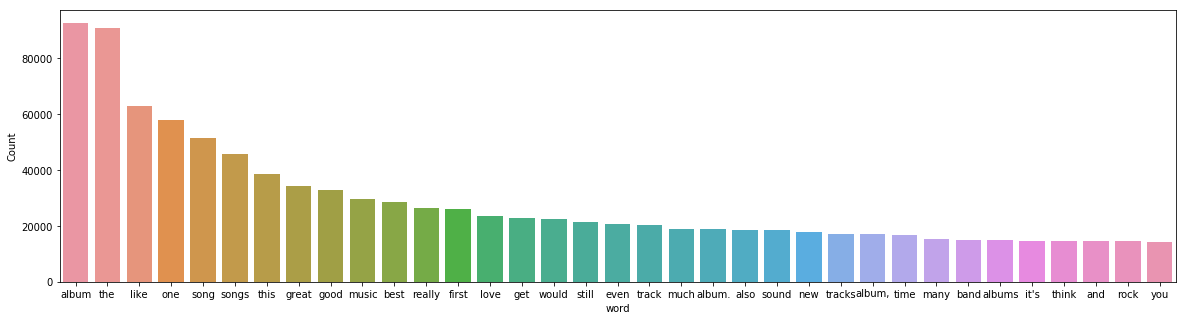

In [7]:
freq_words(reviews, 35)# after removing stop words

In [8]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
     output = []
     for sent in texts:
           doc = nlp(" ".join(sent))
           output.append([token.lemma_ for token in doc if token.pos_ in tags])
     return output

In [9]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['clasically-styled', 'introverted', 'album,', 'memory', 'trees', 'masterpiece', 'subtlety.', 'many', 'songs', 'endearing', 'shyness', 'soft', 'piano', 'lovely,', 'quiet', 'voice.', 'but', 'within', 'every', 'introvert', 'inferno,', 'enya', 'lets', 'fire', 'explode', 'couple', 'songs', 'absolutely', 'burst', 'expected', 'raw', 'power.if', 'never', 'heard', 'enya', 'before,', 'might', 'want', 'start', 'one', 'popularized', 'works,', 'like', 'watermark,', 'play', 'safe.', 'but', 'already', 'fan,', 'collection', 'complete', 'without', 'beautiful', 'work', 'musical', 'art.']


In [10]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['album', 'memory', 'subtlety', 'many', 'song', 'shyness', 'soft', 'piano', 'lovely', 'quiet', 'voice', 'introvert', 'inferno', 'fire', 'explode', 'couple', 'song', 'raw', 'work', 'watermark', 'safe', 'fan', 'collection', 'complete', 'beautiful', 'work', 'musical', 'art']


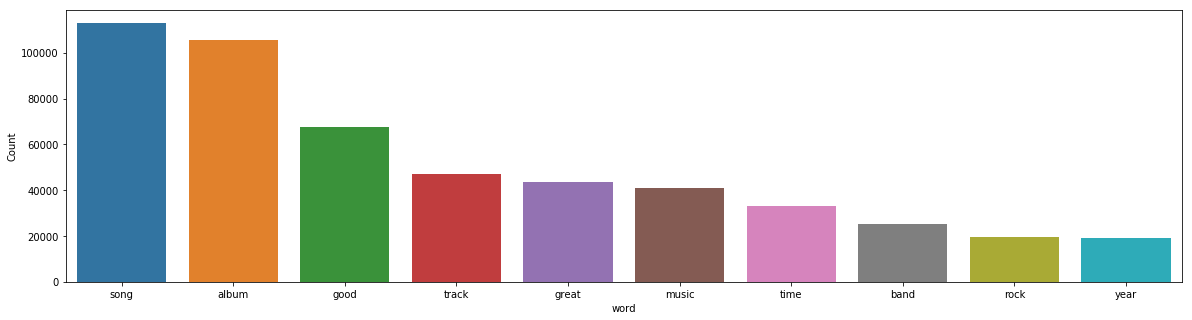

In [13]:
reviews_3 = []
for i in range(len(reviews_2)):
  reviews_3.append(' '.join(reviews_2[i]))
df['reviews'] = reviews_3
freq_words(df['reviews'],10)